In [2]:
import numpy as np

def printMatrix(a):
   print ("Matrix["+("%d" %a.shape[0])+"]["+("%d" %a.shape[1])+"]")
   rows = a.shape[0]
   cols = a.shape[1]
   for i in range(0,rows):
      for j in range(0,cols):
        print ("%7g " %a[i,j],end=" ")
      print()
   print()

def readMatrixFile(FileName):
   rows,cols=np.fromfile(FileName, dtype=int, count=2, sep=" ")
   a = np.fromfile(FileName, dtype=float, count=rows*cols, sep=" ").reshape((rows,cols))
   return a

def readMatrixFileComplex(FileName):
   data = []
   rows,cols=list(map(int, FileName.readline().split()))
   for i in range(0, rows):
      data.append(list(map(complex, FileName.readline().split()[:cols])))
   a = np.array(data)
   return a

f = open('sky_R100_sqrts12_1_15_Ncl.5_Ngx.20_zflux_1M.txt')

a=readMatrixFile(f)
#printMatrix(a)
f.close()



In [3]:
f2 = open('sky_R100_sqrts12_16_30_Ncl.5_Ngx.20_zflux_1M.txt')

a2=readMatrixFile(f2)
f2.close()

In [4]:


import matplotlib.pyplot as plt

%matplotlib inline



In [5]:

import healpy as hp

In [6]:
data1 = a[:,[0]]-0.00011
print(data1)
len(data1)

theta1 = a[:,[1]]
print(theta1)

phi1 = a[:,[2]]
print(phi1)

[[0.96927325]
 [0.96927325]
 [0.96927325]
 ...
 [0.00512894]
 [0.00512894]
 [0.00512894]]
[[1.13169049]
 [1.12472908]
 [1.12337938]
 ...
 [1.27442492]
 [1.27446269]
 [1.27398902]]
[[2.78516113]
 [2.7969255 ]
 [2.78846557]
 ...
 [3.02798291]
 [3.02800511]
 [3.0273661 ]]


In [7]:
data2 = a2[:,[0]]-0.00011
print(data2)
len(data2)

theta2 = a2[:,[1]]
print(theta2)

phi2 = a2[:,[2]]
print(phi2)

[[0.00462383]
 [0.00462383]
 [0.00462383]
 ...
 [0.00238319]
 [0.00238319]
 [0.00238319]]
[[2.0808571 ]
 [2.0817553 ]
 [2.08184546]
 ...
 [2.54262841]
 [2.54252762]
 [2.54277317]]
[[-1.67261836]
 [-1.67311012]
 [-1.67326664]
 ...
 [-1.92524688]
 [-1.9253427 ]
 [-1.92641821]]


In [8]:
data = np.concatenate((data1,data2),axis=None)
len(data)



100000000

In [9]:
theta = np.concatenate((theta1,theta2),axis=None)
len(theta)



100000000

In [10]:
phi = np.concatenate((phi1,phi2),axis=None)
len(phi)


100000000

In [11]:

nside = 1024

print(np.degrees(hp.nside2resol(nside)))



0.05725810686362343


In [12]:

pixel_indices = hp.ang2pix(nside, theta, phi)

print(pixel_indices)



[ 3616536  3575583  3567386 ... 11488285 11485323 11488284]


[0.         0.         0.00334294 ... 0.         0.0042095  0.00652723]


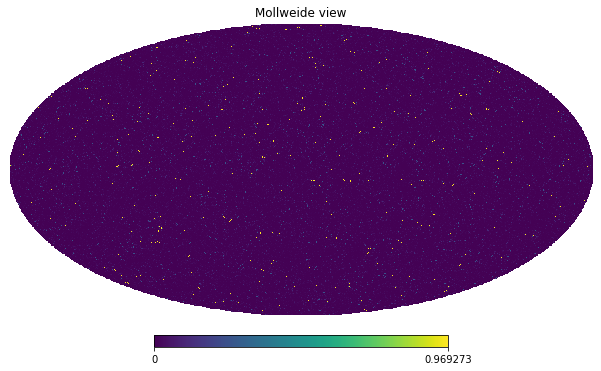

In [13]:

import healpy as hp

m = np.zeros(hp.nside2npix(nside))

#m[pixel_indices] = 1
m[pixel_indices] = data

print(m)

hp.mollview(m)

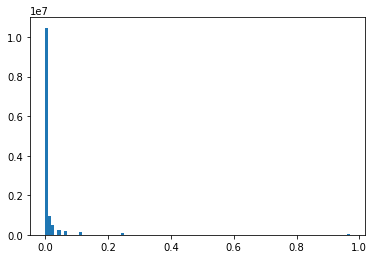

In [14]:
plt.hist(m, bins=100);

In [15]:
LMAX = 1024
cl = hp.anafast(m, lmax=LMAX)
ell = np.arange(len(cl))

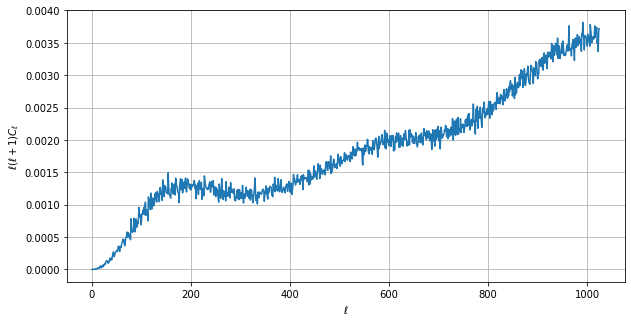

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

In [17]:
m = np.where(m == 0, -1.6375e+30, m)  # set value '1000' where condition is met

print(m)



[-1.63750000e+30 -1.63750000e+30  3.34293819e-03 ... -1.63750000e+30
  4.20949973e-03  6.52723064e-03]


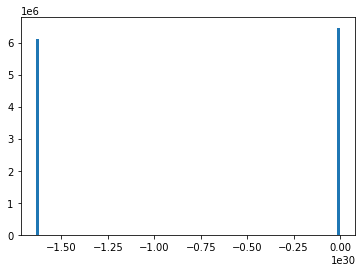

In [18]:
plt.hist(m, bins=100);

[-1.63750000e+30 -1.63750000e+30  3.34293819e-03 ... -1.63750000e+30
  4.20949973e-03  6.52723064e-03]


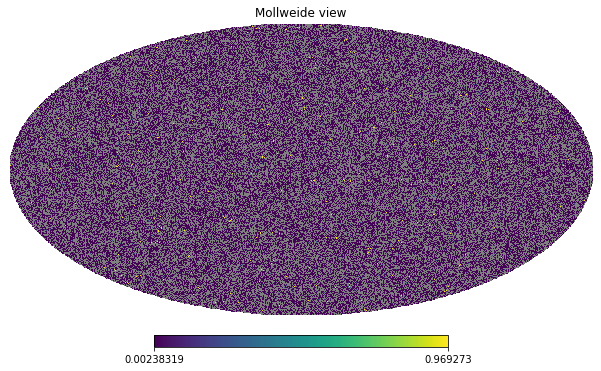

In [19]:
hp.pixelfunc.ma(m, badval=-1.6375e+30, rtol=1e-05, atol=1e-08, copy=True)

print(m)

#wmap_map_I_masked.mask = np.logical_not(mask)

hp.mollview(m)


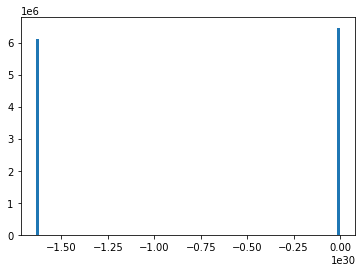

In [20]:
plt.hist(m, bins=100);

In [21]:

#m = np.logical_not(mask)

#hp.mollview(m)



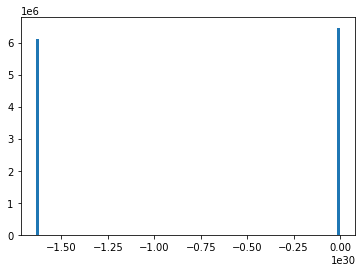

In [22]:
plt.hist(m, bins=100);

In [23]:
#plt.hist(m.compressed(), bins=100);

In [24]:
LMAX = 1024
cl = hp.anafast(m, lmax=LMAX)
ell = np.arange(len(cl))

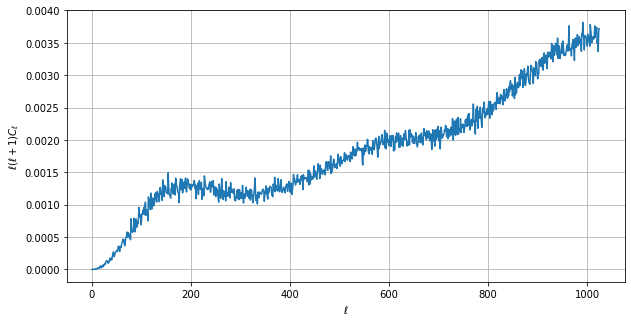

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)